In [4]:
import pandas as pd
from pathlib import Path
from scipy.stats import pointbiserialr
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'  # 设置图像清晰度为 retina 级别


In [22]:
feature_path = Path(r"C:\Users\orfu\Desktop\MyData\BaiduSyncdisk\课程\大数据分析与实践\作业2\output\features.csv")

# 从CSV文件读取DataFrame
df = pd.read_csv(feature_path, index_col=0)

# 提取分类标签列
labels = df.iloc[:, -1]

# 提取其他数值型变量列
features = df.iloc[:, :-1]

# 计算相关性
correlation_matrix = pd.DataFrame(columns=['Variable', 'Correlation', 'p-value'])
for column in features.columns:
    print(features[column], labels)
    correlation, p_value = pointbiserialr(features[column], labels)
    print(column, correlation, p_value)
    correlation_matrix = correlation_matrix._append({'Variable': column, 'Correlation': correlation, 'p-value': p_value}, ignore_index=True)

# 按照相关系数从高到低排序
correlation_matrix = correlation_matrix.sort_values(by='Correlation', ascending=False)

# 打印排序后的相关性结果
print(correlation_matrix)

1 liver            210.976032
1 other organ     1259.178250
10 liver           612.713564
10 other organ     922.603195
14 liver           494.673560
14 other organ     706.692325
16 liver           563.169091
16 other organ     630.071911
18 liver           801.816241
18 other organ     725.306327
19 liver           978.752879
19 other organ     638.548205
2 liver            151.636791
2 other organ      672.449491
21 liver           191.533566
21 other organ     763.733171
22 liver           177.708847
22 other organ     699.742741
23 liver            86.571931
23 other organ     753.857433
24 liver           117.289272
24 other organ     776.158814
25 liver           127.361800
25 other organ     972.094558
26 liver           152.441529
26 other organ     729.556642
27 liver           153.367811
27 other organ     771.440907
28 liver           399.990513
28 other organ     688.030088
29 liver           151.001959
29 other organ     681.909474
30 liver           558.558494
30 other o

-0.5578110093427531 -0.0376304018914104
0.0370524474204407 0.3163604440625333
0.2242690560484556 0.5029141378842331
0.3857502152819076 0.7479858378900951


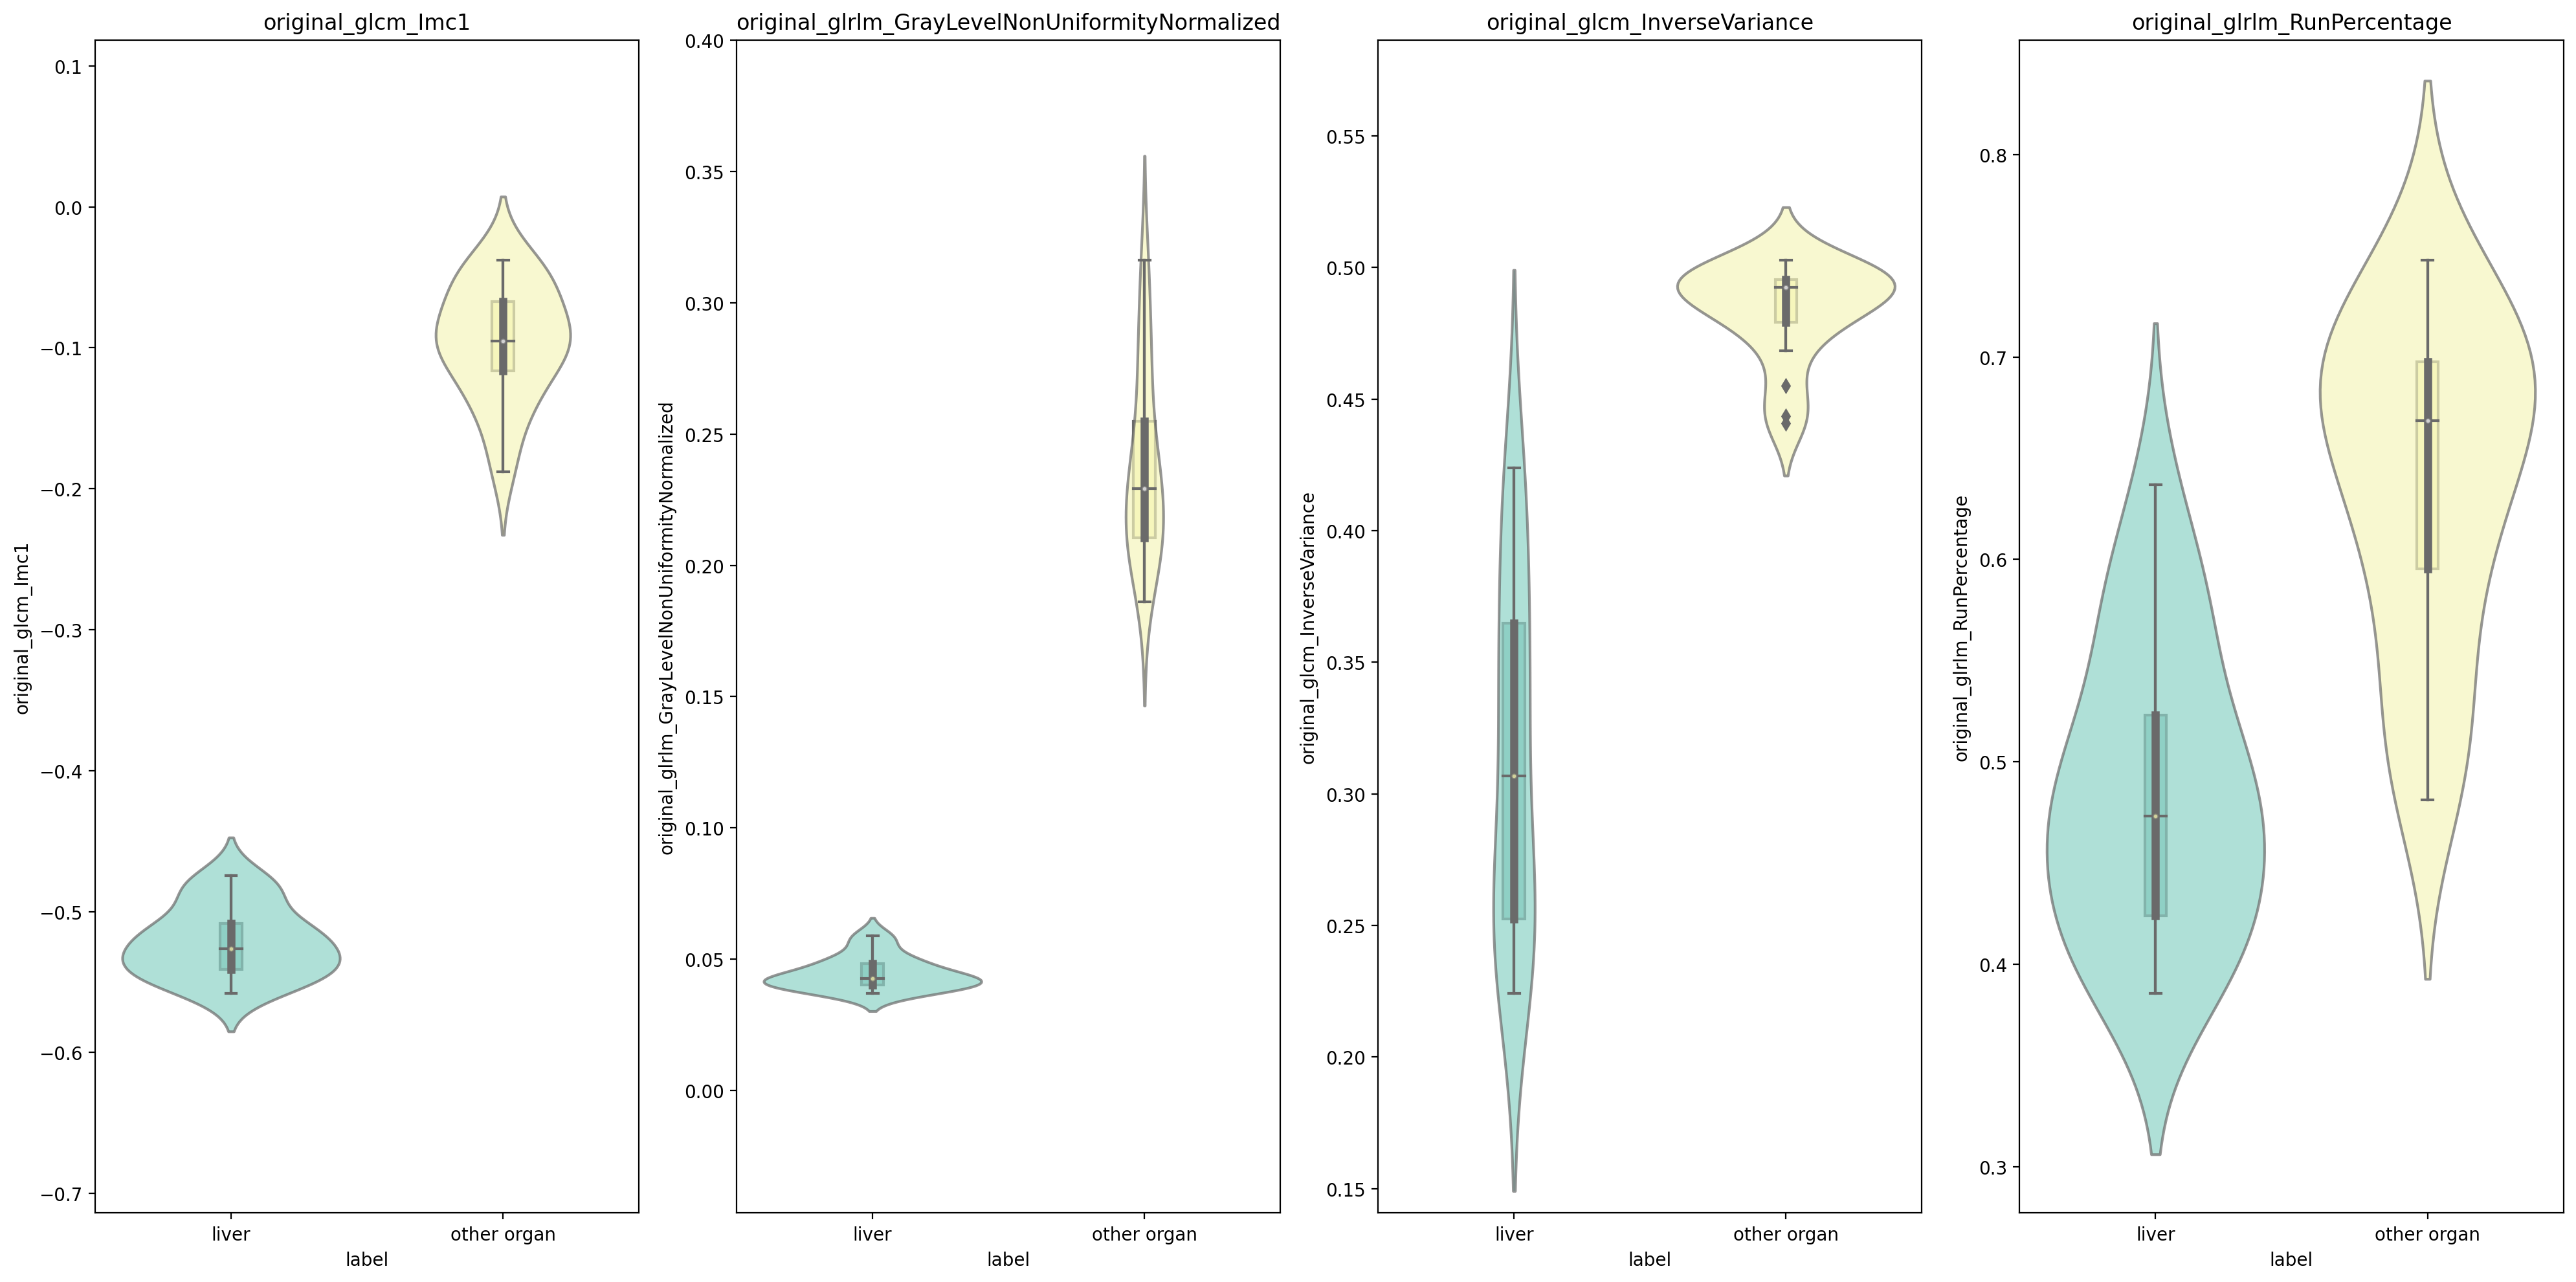

In [55]:
top_variables = correlation_matrix.head(5)['Variable'].tolist()
# 添加分类标签列到选取的变量中
top_variables.append(df.columns[-1])

# 生成包含选取变量的子集DataFrame
subset_df = df[top_variables]

# 创建一个2x2的子图布局
fig, axes = plt.subplots(1, 4, figsize=(20, 10))

# 循环遍历每个子图
for i, ax in enumerate(axes.flatten()):
    # 提取当前子图对应的变量名和分类标签值
    var_name = top_variables[i]
    class_labels = subset_df[top_variables[-1]].unique()
    
    # 绘制小提琴图
    violin = sns.violinplot(data=subset_df, x=top_variables[-1], y=var_name, ax=ax, palette='Set3', alpha=0.5)
    box = sns.boxplot(data=subset_df, x=top_variables[-1], y=var_name, ax=ax, palette='Set3', width=0.08)

    # 设置小提琴图和箱线图的不透明度
    for collection in violin.collections:
        collection.set_alpha(0.7)

    for collection in box.collections:
        collection.set_alpha(0.7)

    # 设置子图标题
    ax.set_title(f'{var_name}')
    
    # 设置y轴取值范围使得小提琴图居中显示
    y_min, y_max = subset_df[var_name].min(), subset_df[var_name].max()
    print(y_min, y_max)
    y_range = y_max - y_min
    ax.set_ylim(y_min - 0.3*y_range, y_max + 0.3*y_range)
    
    # 设置相同类别的小提琴使用相同的颜色
    color_palette = sns.color_palette('Set3')
    for j, label in enumerate(class_labels):
        violin = ax.collections[j]
        violin.set_facecolor(color_palette[j])
    
    # 移除x轴标签
    ax.set_xticklabels(['liver' if label == 1 else 'other organ' for label in class_labels])
    
# 调整子图布局间距
plt.tight_layout()

# 显示图表
plt.show()